# DSC 630
# Project
# Author: Muthukumar Kadhirvel
# 10/1/2022

Heart disease is a generic term used to represent all conditions that affect the structure and functioning of the heart. Coronary heart disease is a specific type of heart disease where the heart’s arteries cannot pump enough blood to the heart that has enough oxygen. In USA alone there are around 18.2 million people with coronary heart disease and that makes it one of the deadliest heart diseases in USA according to CDC.

Coronary Heart Disease is a severe problem and detecting the presence of it in the earlier stages would help the person get cured or do not let it become serious by changing their lifestyle, medicine, surgery etc. If we identify the prospective patients by a robust model, then hospitals and clinics can use that model to identify undiagnosed patients who are at risk for the disease. This can improve the spending for the patient and improve the quality of life as well.

In this project we will work with a practice dataset that has details of patients and the dataset can be downloaded below.
https://www.kaggle.com/datasets/jiantay33/coronary-prediction

The above dataset from Kaggle has multiple useful information of over four thousand patients like Gender/Age/Education/Smoker/Blood Pressure/Stroke occurrence/Hypertension/Cholesterol/ Diabetes /BMI/Heart Rate/Glucose etc. The target variable has the status of if the patient will suffer Coronary Heart Disease in the next ten years (Ten Year Coronary Heart Disease).

We will first clean and transform the data as required as there are some missing values and then we can perform Exploratory Data Analysis (EDA) and prepare the data for modeling. Once the data is prepared we can split the data into training dataset and test dataset and then build the model on the training dataset. Once the model is ready we can use it to apply prediction on the test dataset and evaluate the same for accuracy.

Install necessary packages and read the coronary prediction dataset and print the properties of the same

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import seaborn as sns
warnings.filterwarnings("ignore")
chd_df = pd.read_csv('coronary_prediction.csv')
print(chd_df.head())
print(chd_df.shape)
print(chd_df.describe())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

We can see that there are 4238 rows and 16 columns
<br>Nominal Features - male/currentSmoker/BPMeds/prevalentStroke/prevalentHyp/diabetes
<br>Ordinal Features - education
<br>Continuous Features - age/cigsPerDay/totChol/sysBP/diaBP/BMI/heartRate/glucose
<br>Target Variable - TenYearCHD

Create Histograms for numerical data of age & education by overlapping the histogram with the two levels of the target variable to see if there are any changes to the distribution of the numeric variable

<AxesSubplot:ylabel='Frequency'>

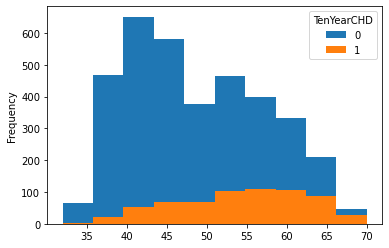

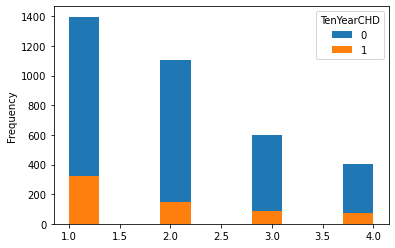

In [2]:
chd_df.pivot(values='age',columns='TenYearCHD').plot.hist()
chd_df.pivot(values='education',columns='TenYearCHD').plot.hist()

We can see that for persons less than 35 there is very little risk of CHD and even for people aged less than 40 it is the same.

As far as education is concerned we can see that the majority of patients have education level of 1 but the percentage of people having CHD does not seem to depend on education but still we need to explore more further.

Create scatter plots of sysBP/diaBP to examine the relationship between certain numeric variables that are typically tied together in medical analysis

0.7840020914320169
0.165182372725787


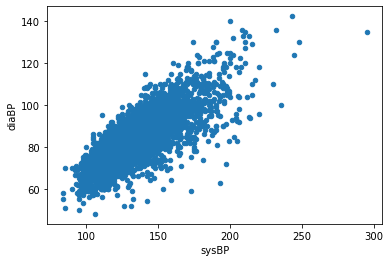

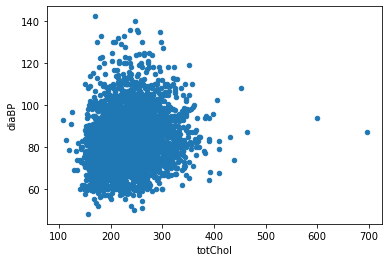

In [3]:
chd_df.plot.scatter('sysBP','diaBP')
# We can see there is a highly positive correlation between sysBP and diaBP
print(chd_df['sysBP'].corr(chd_df['diaBP']))
# The corr function also returns a high postive correlation value
chd_df.plot.scatter('totChol','diaBP')
# There is no correlation between totChol and diaBP features
print(chd_df['totChol'].corr(chd_df['diaBP']))
# The corr function also returns a low postive correlation value

Find the missing values

In [4]:
chd_df.isnull().sum()
# All the below fields have missing values and we are going to handle them as appropriately
# education - Since by the histogram we can see that there are more people with Level 1 we will replace NA with mode
# cigsPerDay - Only smokers should have a value and so smokers with NA values can be replaced by mean
# BPMeds - In medical terms people with prevalentHyp/prevalentStroke will take BPMeds and so check that and replace accordingly
# totChol - Replace NA by mean as continuous variable
# BMI - Replace NA by mean as continuous variable
# heartRate - Replace NA by mean as continuous variable
# glucose - Replace NA by mean as continuous variable

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
print(chd_df['education'].mode())
# Replace education NA with 1
chd_df['education'].fillna(1,inplace=True)
smoker_df = chd_df.groupby(['currentSmoker'])
print(smoker_df['cigsPerDay'].mean())
# Replace smokers NA with 18 cigsPerDay
# Replace all nan values with 9999
chd_df['cigsPerDay'].fillna(9999,inplace=True)
for i,x in enumerate(chd_df['cigsPerDay']):
    if chd_df['cigsPerDay'].loc[i] == 9999:
        if chd_df['currentSmoker'].loc[i] == 1:
            chd_df['cigsPerDay'].loc[i] = 18
        else:
            chd_df['cigsPerDay'].loc[i] = 0 
# Group data by prevalentHyp and we can see all the rows where BPMeds is 1 we have prevalentHyp also as 1 and 0 if 0
# So we can replace BPMeds NA with value of prevalentHyp
BPMeds_Hyp_df = chd_df.groupby(['prevalentHyp'])
print(BPMeds_Hyp_df['BPMeds'].sum())
# Group data by prevalentStroke and we can see that there is no correlation
BPMeds_Stroke_df = chd_df.groupby(['prevalentStroke'])
print(BPMeds_Stroke_df['BPMeds'].sum())
# Replace all nan values with 9999
chd_df['BPMeds'].fillna(9999,inplace=True)
for i,x in enumerate(chd_df['BPMeds']):
    if chd_df['BPMeds'].loc[i] == 9999:
        chd_df['BPMeds'].loc[i] = chd_df['prevalentHyp'].loc[i]
print(chd_df['totChol'].mean())
# Replace totChol NA with 237
chd_df['totChol'].fillna(237,inplace=True)
print(chd_df['BMI'].mean())
# Replace BMI NA with 26
chd_df['BMI'].fillna(26,inplace=True)
print(chd_df['heartRate'].mean())
# Replace heartRate NA with 76
chd_df['heartRate'].fillna(76,inplace=True)
print(chd_df['glucose'].mean())
# Replace glucose NA with 82
chd_df['glucose'].fillna(82,inplace=True)
chd_df.isnull().sum()
# All missing values have been handled

0    1.0
Name: education, dtype: float64
currentSmoker
0     0.000000
1    18.350605
Name: cigsPerDay, dtype: float64
prevalentHyp
0      0.0
1    124.0
Name: BPMeds, dtype: float64
prevalentStroke
0    117.0
1      7.0
Name: BPMeds, dtype: float64
236.72158548233045
25.80200758473571
75.87892376681614
81.96675324675324


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

           male           age  education  currentSmoker  cigsPerDay  \
0  8.842757e-02  2.252561e-01   0.052812       0.019456    0.056467   
1  8.106543e-09  6.845009e-50   0.000583       0.205389    0.000235   

         BPMeds  prevalentStroke  prevalentHyp      diabetes       totChol  \
0  9.303388e-02         0.061810  1.776027e-01  9.731651e-02  8.162987e-02   
1  1.296138e-09         0.000057  2.261088e-31  2.174222e-10  1.029644e-07   

          sysBP         diaBP       BMI  heartRate       glucose  
0  2.164290e-01  1.452991e-01  0.074907   0.022903  1.203978e-01  
1  4.195340e-46  1.968835e-21  0.000001   0.136028  3.714734e-15  


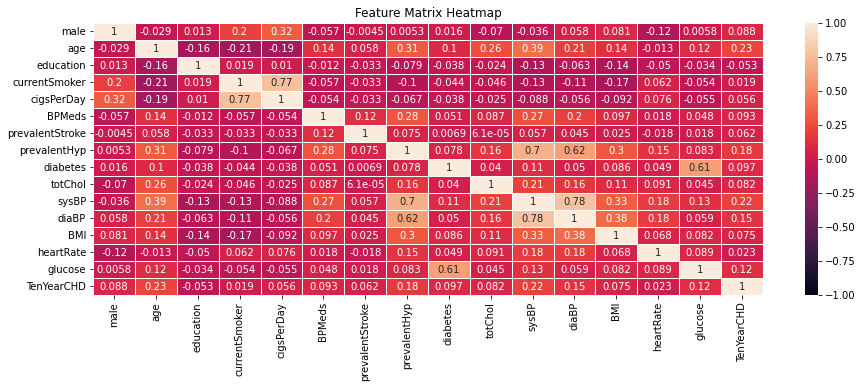

In [6]:
# Create correlation matrix as mixture of feature variables against TenYearCHD
# We use point-biserial correlation as our dataset has a mixture of continuous and binary variables
features = chd_df[chd_df.columns[chd_df.columns!='TenYearCHD'] ]
biserialr_matrix = features.corrwith(chd_df['TenYearCHD'].astype('float'), method=stats.pointbiserialr)
print(abs(biserialr_matrix))
# We can see from the Correlation Matrix that there are no clear variables that have a good correlation with TenYearCHD variable
# Create heatmap to identify correlation within the other variables as well
plt.figure(figsize=(15,5))
sns.heatmap(chd_df.corr(), vmin = -1, vmax = 1, annot = True, linewidths=1)
plt.title('Feature Matrix Heatmap')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()
# We can see that sysBP and diaBP have good correlation which we have identified before as well
# Similarly sysBP and prevalentHyp also has good correlation

Create a basic Logistic Regression model as ours is a Classification problem

Size of training data is 3390
Size of test data is 848
Logistic Regression Model accuracy on the test set is 82.42924528301887


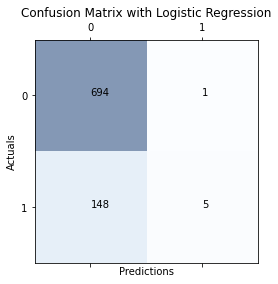

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# Create features matrix with all columns except TenYearCHD which is the target
features = chd_df.drop(['TenYearCHD'], axis = 1)
# Create target vector
target = chd_df.TenYearCHD
# Create training and test sets with test size being 20%
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)
print('Size of training data is',len(features_train))
print('Size of test data is',len(features_test))
# Train an ordinary Logistic regression on the training data.
logit = LogisticRegression()
logit.fit(features_train, target_train)
target_predicted = logit.predict(features_test)
# We use accuracy as the metric as ours is a classification problem
accuracy = accuracy_score(target_test,target_predicted)*100
print('Logistic Regression Model accuracy on the test set is',accuracy)
# We get a good accuracy in the simple Logistic Regression model but accuracy itself is not enough
# Create a confusion matrix for the test set predictions.
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with Logistic Regression')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that although the accuracy is high the prediction got it wrong most of the time for times when TenYearCHD is 1

We will now create a Random Forest model to see if it fares better

Random Forest Classifier Model accuracy on the test set is 82.19339622641509


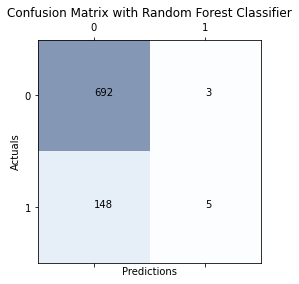

In [8]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(features_train, target_train)
target_predicted = classifier.predict(features_test)
accuracy = accuracy_score(target_test,target_predicted)*100
print('Random Forest Classifier Model accuracy on the test set is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with Random Forest Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that accuracy and confusion matrix for Random Forest Classifier is very similar to Logistic Regression
# So we need to try out other models as well

We will now implement Decision Tree Classifier model to see if any differences

Decision Tree Classifier Model accuracy on the test set is 75.11792452830188


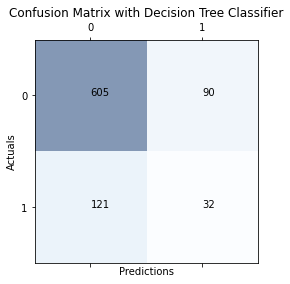

In [9]:
from sklearn.tree import DecisionTreeClassifier
# We are starting off with a max_depth of 15
dtree = DecisionTreeClassifier(max_depth=15)
dtree.fit(features_train, target_train)
target_predicted = dtree.predict(features_test)
accuracy = accuracy_score(target_test,target_predicted)*100
print('Decision Tree Classifier Model accuracy on the test set is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Confusion Matrix with Decision Tree Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that the accuracy has reduced but there are more accurate predictions in terms of TenYearCHD value of 1
# That is the most important criteria and so we will stick to Decision Tree Classifier but do scaling now

Decision Tree Classifier Model accuracy on the test set with scaled data is 79.71698113207547


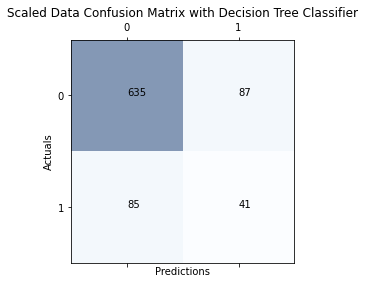

In [10]:
# Perform MinMaxScaler on the data
from sklearn.preprocessing import MinMaxScaler
scaled_data = MinMaxScaler().fit_transform(chd_df)
scaled_chd_df = pd.DataFrame(scaled_data,columns = chd_df.columns)
scl_features = scaled_chd_df.drop(['TenYearCHD'], axis = 1)
scl_target = scaled_chd_df.TenYearCHD
# Create training and test sets with test size being 20% on the scaled data
scl_features_train,scl_features_test,scl_target_train,scl_target_test = train_test_split(scl_features,scl_target,test_size=0.2)
scl_dtree = DecisionTreeClassifier(max_depth=15)
scl_dtree.fit(scl_features_train, scl_target_train)
target_predicted = scl_dtree.predict(scl_features_test)
accuracy = accuracy_score(scl_target_test,target_predicted)*100
print('Decision Tree Classifier Model accuracy on the test set with scaled data is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(scl_target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('Scaled Data Confusion Matrix with Decision Tree Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see that the accuracy has improved and also we have identified more correct TenYearCHD value of 1

I came across SMOTE - Synthetic Minority Oversampling Technique - This technique is used in cases where there is imbalanced datasets with respect to predicting minority class which in case of us is the TenYearCHD value of 1

In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over_sample = SMOTE()
under_sample = RandomUnderSampler()
steps = [('o',over_sample),('u',under_sample)]
pipeline = Pipeline(steps=steps)
# Create a new resample training dataset based on SMOTE using the scaled dataa
resample_features, resample_target = pipeline.fit_resample(scl_features,scl_target)
resample_df = resample_features
resample_df['TenYearCHD'] = resample_target
print(resample_df)
# Post resample we have a bigger dataset to work with
features = resample_df.drop(['TenYearCHD'], axis = 1)
target = resample_df.TenYearCHD
# Create training and test sets with test size being 20% on the resampled data
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size=0.2)
print('Size of training data is',len(features_train))
print('Size of test data is',len(features_test))
print(resample_df['TenYearCHD'].value_counts())
# We now have a bigger dataset with equal instances of TenYearCHD value of 0 and 1

      male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0      1.0  0.184211   1.000000            0.0    0.000000     0.0   
1      0.0  0.368421   0.333333            0.0    0.000000     0.0   
2      1.0  0.421053   0.000000            1.0    0.285714     0.0   
3      0.0  0.368421   0.666667            1.0    0.328571     0.0   
4      0.0  0.289474   0.333333            0.0    0.000000     0.0   
...    ...       ...        ...            ...         ...     ...   
7183   1.0  0.305591   0.000000            1.0    0.428571     0.0   
7184   0.0  0.317117   0.000000            0.0    0.000000     0.0   
7185   1.0  0.815789   1.000000            1.0    0.285714     0.0   
7186   1.0  0.665321   1.000000            0.0    0.000000     0.0   
7187   1.0  0.614071   0.333333            1.0    0.282150     0.0   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.0           0.0       0.0  0.149406  0.106383  0.232804   
1

Decision Tree Classifier Model accuracy on the test set with SMOTE is 78.37273991655076


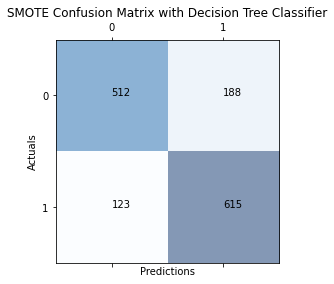

In [12]:
# Now implement Decision Tree Classifier on the resampled dataset
resample_dtree = DecisionTreeClassifier(max_depth=15)
resample_dtree.fit(features_train,target_train)
target_predicted = resample_dtree.predict(features_test)
accuracy = accuracy_score(target_test,target_predicted)*100
print('Decision Tree Classifier Model accuracy on the test set with SMOTE is',accuracy)
# Create confusion matrix for target_predicted and plot a Confusion Matrix Heat map
matrix = confusion_matrix(target_test, target_predicted)
plt.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.text(x=j, y=i,s=matrix[i, j])
plt.title('SMOTE Confusion Matrix with Decision Tree Classifier')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()
# We can see now that TenYearCHD value of 1 prediction is the best we have and we can now implement this model